In [1]:
##ScrapeLangmuirData
##Written by Rebecca Rapf and Tim Mose
##June 10, 2021 and updated June 16, 2021

###Read in csv's of Langmuir trough data and export the useful bits for loading into Igor

##import relevant libraries
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt 
import os
#imports everything that we need

In [2]:
##Parameters to be changed for each analysis##
FilePath = "/Users/timmo/Documents/RAPFLAB/code/langmuir/test/" ##currently local only, will change to read from google drive
OutFolder = "Processed" #Folder that the processed files get sent to
XLabel = "A_cm^2" #label for x axis
YLabel="P1[mN/m]" #label for y axis
OutputName = "Graph" #name of graph that will be saved in OutFolder
FileType = "xlsx" #pick from "xlsx" or "csv"
Surfactant = "MA_300mMKCl" #name of surfactant and/or conditions
#StockConcSame = "yes" #"yes" or "no" if same concentration was used for each run

StockConc = 4.18 #mM 
#MM = 284.48 #molecular weight in (g/mol)
VolDeposit_uL = 20 #volume stock solution deposited in 
########

##File-Specific Parameters####
header_length = 43 #skip the first 43 lines in the file
#########

##Constants Library##
AVOGADRO = 6.022*10**23
uL_CONVERSION = 10**6 #number of uL in 1 L
Ang_CONVERSION = 10**10 #number of Angstroms in 1 m
cm_CONVERSION = 10**2 #number of cm in 1 m
cm2_to_Ang2 = Ang_CONVERSION**2/cm_CONVERSION**2
#print(cm2_to_Ang2)
###########

####Calculate number of molecules deposited###
VolDeposit_L = VolDeposit_uL/uL_CONVERSION
AmountDeposit = ((StockConc/1000))*(VolDeposit_L)
NumMolecules = AmountDeposit*AVOGADRO
#print(NumMolecules)

##Set file path to where data is being held locally
os.chdir(FilePath)
print(os.getcwd())
print(FilePath+OutFolder)


C:\Users\timmo\Documents\RAPFLAB\code\langmuir\test
/Users/timmo/Documents/RAPFLAB/code/langmuir/test/Processed


In [3]:
files = sorted(glob.glob("21"+"*"+FileType))
files.sort(key=os.path.getmtime)
print(files)

num_files = len(files)

AllFiles = pd.DataFrame()

YAxis=[] #empty list containing all values of the Y-Axis for each file read
XAxis=[] #empty list containing all values of the X-Axis for each file read
LegendNames = [] #list containing all legend names (empty now, but will add to it during the script)
LegendNamesFixed = []
for entry in range(len(files)):
    name = files[entry]
    outname = name[:-(len(FileType)+1)]
    #print(name)
    if FileType == "csv":
        CurrFile = pd.read_csv(files[entry],skiprows = header_length)
    elif FileType == "xlsx":
        #CompFile = files[entry]w
        #print(CompFile)
        CurrFile = pd.read_excel(files[entry],skiprows = header_length)
        #print(CurrFile)
        #print("excel")
        CurrFile = CurrFile.rename(columns={CurrFile.columns[3]: "A_cm2"})
        CurrFile = CurrFile.rename(columns={CurrFile.columns[4]: "MMA"})
        MMA = CurrFile["MMA"]
        ##########################
        
        XAxis.append(CurrFile["A_cm2"]) #appends the "A_cm2" column to the XAxis dataframe
        YAxis.append(CurrFile["P1[mN/m]"]) #appends the "P1[mN/m]" column to the YAxis dataframe. Will be plotted later
        #########################
        
        
        #FullSplit = name.split("_|.")#gets all parts of the file name
        import re
        FullSplit = re.split("[_|.]", name)
        
        if FullSplit[4] == "xlsx":
            LegendNames.append((FullSplit[0]+"_"+FullSplit[3]))
        elif FullSplit[4] != "xlsx":
            LegendNames.append((FullSplit[0]+"_"+FullSplit[3]+"_"+FullSplit[4]))
        print(FullSplit)
        #print(CurrFile)
        
        #MMACheck = CurrFile["MMA"]
        #print(CurrFile.iloc[0,4])
        if np.isnan(CurrFile.iloc[0,4]) == True:
            A_Ang2 = (CurrFile["A_cm2"]*cm2_to_Ang2)
            CurrFile.insert(4, "A_Ang2", A_Ang2)
            MMA=CurrFile["A_Ang2"]/NumMolecules
        
        
        IndFile = pd.DataFrame(columns = [outname+"_Acm2",outname+"_P",outname+"_MMA"])
        IndFile[outname+"_Acm2"]=CurrFile["A_cm2"]
        IndFile[outname+"_P"]=CurrFile["P1[mN/m]"]
        IndFile[outname+"_MMA"]=MMA
####Names columns in processed files
        AllFiles[outname+"_Acm2"]=CurrFile["A_cm2"]
        AllFiles[outname+"_P"]=CurrFile["P1[mN/m]"]
        AllFiles[outname+"_MMA"]=MMA
####Names columns in combined csv file
        IndFile.to_csv(OutFolder+"/"+outname+"_Processed.csv")
AllFiles.to_csv(OutFolder+"/"+Surfactant+"_AllProcessed.csv")#determines where final file goes

['210614_1654_MA_300mMKCl_bad.xlsx', '210614_1050_MA_300mMKCl.xlsx']
['210614', '1654', 'MA', '300mMKCl', 'bad', 'xlsx']
['210614', '1050', 'MA', '300mMKCl', 'xlsx']


In [4]:
####################Figure style --> will be used for plotting
def FigStyle(): #axis will be shared
    mpl.rcParams['font.family'] = 'Arial'
    plt.rcParams['font.size'] = 12
    
    plt.rcParams['axes.linewidth'] = 1
    mpl.rcParams['axes.spines.right'] = True
    mpl.rcParams['axes.spines.top'] = True
    #plt.axis(xmin=25,xmax=250)
    
    mpl.rcParams['xtick.top']=False
    mpl.rcParams['ytick.right']=False
    ax.tick_params(direction='inout')
    ax.tick_params('both', length=6, width=2, which='major')
    ax.legend(LegendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.01, 1)) #creates legend and specifies location + formatting
   
    plt.xlabel(XLabel, size=15) #x axis label
    plt.ylabel(YLabel, size=17) #y axis label
    
    #ax.legend(legendNames, framealpha=1, frameon=False, bbox_to_anchor=(1.02, 1)) #creates legend and specifies location + formatting
    
    
    plt.savefig(OutFolder+"/"+OutputName+".png", dpi=300, transparent=False)
    plt.show() #shows the final plot
    

    #sets basic formatting for our plot


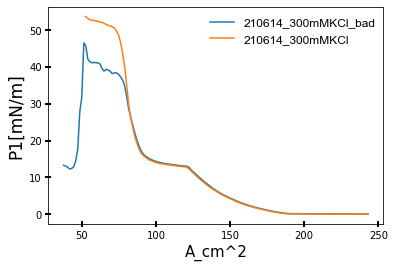

In [5]:
######## Plots a graph based on XAxis and YAxis list with
fig, ax = plt.subplots(sharex =True , sharey= True, figsize=(6,4))
for i in range(len(XAxis)):
    x= XAxis[i]
    y= YAxis[i] #plots the x and y values of each dataframe individually on a shared axis
    plt.plot(x, y) #actually plots our graph
    

FigStyle();  
plt.show() #shows the final plot
